In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
air_data = pd.read_csv("C:/Users/Pgran/Documents/Python Scripts/Untitled Folder/SARP_mysamples.csv")

In [4]:
air_alton = air_data[air_data["Location"] == "Alton, Texas"]
air_SantaAna = air_data[air_data["Location"] != "Alton, Texas"]

In [7]:
air_data.corr()

,Can #,Snake can #,Box,Altitude (m),Temp. Celsius,Wind Spd (mph),Julian Time,Lat (deg),Long (deg),CH4 (ppmv height),...,3-Ethyltoluene (MS),4-Ethyltoluene (MS),2-Ethyltoluene (MS),"1,3,5-Trimethylbenzene (MS)","1,2,4-Trimethylbenzene (MS)",alpha-Pinene (B/MS),beta-Pinene (B/MS),Unnamed: 113,Box.1,CH4 (ppmv height).1
Can #,1.000000,-0.928357,NaN,-0.312893,-0.057367,-0.046879,-0.062116,-0.312899,0.100187,-0.106651,...,-0.388278,-0.219824,-0.219624,-0.072579,-0.427951,-0.058124,-0.217214,NaN,NaN,-0.106651
Snake can #,-0.928357,1.000000,NaN,0.199491,0.093904,0.152205,0.167551,0.196782,-0.096098,0.084456,...,0.327496,0.095980,0.095955,-0.083586,0.332224,0.070094,0.147609,NaN,NaN,0.084456
Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altitude (m),-0.312893,0.199491,NaN,1.000000,0.582576,0.207266,0.032093,0.996975,-0.836886,-0.117346,...,0.100563,0.198144,0.198461,0.095456,0.323245,-0.292533,-0.306612,NaN,NaN,-0.117346
Temp. Celsius,-0.057367,0.093904,NaN,0.582576,1.000000,0.507978,0.115167,0.596233,-0.508822,-0.341098,...,0.108163,0.441842,0.442331,0.282454,0.203883,-0.128860,-0.142244,NaN,NaN,-0.341098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
alpha-Pinene (B/MS),-0.058124,0.070094,NaN,-0.292533,-0.128860,0.128609,0.329285,-0.277809,-0.007732,-0.198459,...,0.211612,0.166091,0.165991,0.194666,0.130305,1.000000,0.450141,NaN,NaN,-0.198459
beta-Pinene (B/MS),-0.217214,0.147609,NaN,-0.306612,-0.142244,-0.079574,0.510183,-0.308273,0.229071,-0.593801,...,0.325716,0.092785,0.092691,0.039526,0.326285,0.450141,1.000000,NaN,NaN,-0.593801
Unnamed: 113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Box.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def air_gas(site1, site1name,site2,site2name,targetgas):

    plt.figure(figsize=(12,7))
    x1=site1["Date"]
    y1=site1[targetgas]
    a1=site2["Date"]
    b1=site2[targetgas]
    plt.subplot(2,2,1)
    plt.scatter(x1,y1,label=site1name)
    plt.scatter(a1,b1, label=site2name)
    plt.xticks(rotation=45)
    plt.legend()
    plt.title(targetgas)

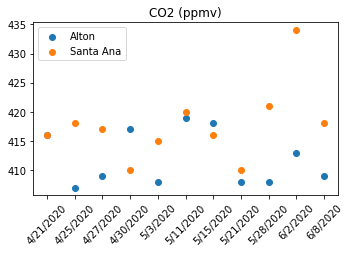

In [13]:
air_gas(air_alton,"Alton",air_SantaAna,"Santa Ana","CO2 (ppmv)")

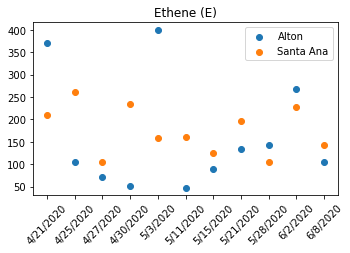

In [15]:
air_gas(air_alton,"Alton",air_SantaAna,"Santa Ana","Ethene (E)")

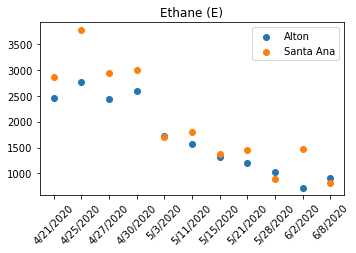

In [31]:
air_gas(air_alton,"Alton",air_SantaAna,"Santa Ana","Ethane (E)")

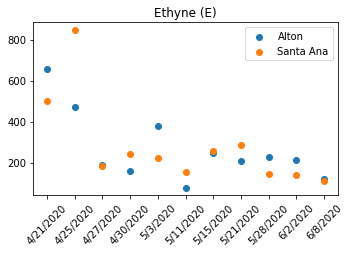

In [32]:
air_gas(air_alton,"Alton",air_SantaAna,"Santa Ana","Ethyne (E)")

### Ethene and CO2 are related to vehicle emissions. Are they related?

In [21]:
def gases_correlate(site,sitename,gas1,gas2):
    site = site.dropna(subset = [gas1,gas2])#in case there are any nans
    X = site[gas1]
    Y = site[gas2]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    
    #plot the relationship
    plt.plot(X[gas1],predictions,"k--")
    plt.scatter(site[gas1],site[gas2],label=sitename)
    plt.xlabel(gas1)
    plt.ylabel(gas2)
    plt.legend()
    print(model.params)

const         1825.846539
CO2 (ppmv)      -4.036697
dtype: float64


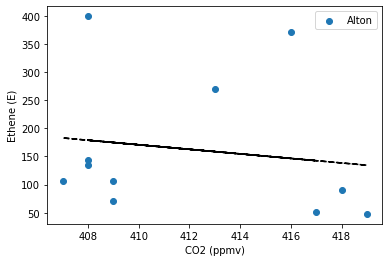

In [22]:
gases_correlate(air_alton,"Alton","CO2 (ppmv)","Ethene (E)")

const         54.156936
CO2 (ppmv)     0.289069
dtype: float64


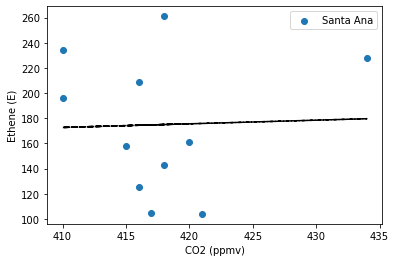

In [23]:
gases_correlate(air_SantaAna,"Santa Ana","CO2 (ppmv)","Ethene (E)")

### What about CO and Ethene?

const        117.432503
CO (ppbv)      0.367156
dtype: float64


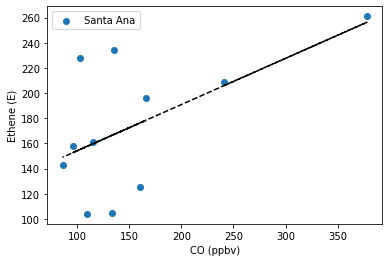

In [24]:
gases_correlate(air_SantaAna,"Santa Ana","CO (ppbv)","Ethene (E)")

const        68.792525
CO (ppbv)     0.611048
dtype: float64


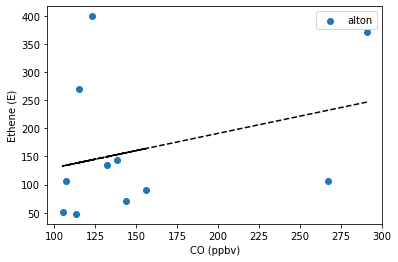

In [25]:
gases_correlate(air_alton,"alton","CO (ppbv)","Ethene (E)")

In [27]:
np.corrcoef(air_alton["CO (ppbv)"],air_alton["Ethene (E)"])

array([[1.       , 0.3126322],
       [0.3126322, 1.       ]])

In [28]:
np.corrcoef(air_SantaAna["CO (ppbv)"],air_SantaAna["Ethene (E)"])

array([[1.        , 0.57936537],
       [0.57936537, 1.        ]])

In [29]:
np.corrcoef(air_alton["CO2 (ppmv)"],air_alton["Ethene (E)"])

array([[ 1.        , -0.15031621],
       [-0.15031621,  1.        ]])

In [30]:
np.corrcoef(air_SantaAna["CO2 (ppmv)"],air_SantaAna["Ethene (E)"])

array([[1.        , 0.03440817],
       [0.03440817, 1.        ]])